In [208]:
from pyspark.sql import SparkSession
from pyspark import SparkContext
import os
from pyspark.sql.functions import col, lit, to_date, split, when, coalesce, count, udf
from pyspark.sql.types import MapType, StringType

In [209]:
spark = SparkSession.builder \
                    .appName('tennis') \
                    .getOrCreate()

In [210]:
folders = ["singles/", "doubles/", "futures/", "qual_chal/"]
file_columns = []
files65 = []
files49= []

In [211]:
for folder in folders:
    for filename in os.listdir(folder):
    
        file_path = os.path.join(folder, filename)
        
        df = spark.read.option("header", "true") \
                       .option("inferSchema", "true") \
                       .csv(file_path)
        
        #file_columns.append({filename:df.columns})
        file_columns.append(df.columns)
        if len(df.columns) == 65:
            files65.append(filename)
        else:
            files49.append(filename)

In [212]:
# Removing duplicates
file_columns = list(set(map(tuple, file_columns)))
file_columns = [list(item) for item in file_columns]
file_columns

[['tourney_id',
  'tourney_name',
  'surface',
  'draw_size',
  'tourney_level',
  'tourney_date',
  'match_num',
  'winner_id',
  'winner_seed',
  'winner_entry',
  'winner_name',
  'winner_hand',
  'winner_ht',
  'winner_ioc',
  'winner_age',
  'loser_id',
  'loser_seed',
  'loser_entry',
  'loser_name',
  'loser_hand',
  'loser_ht',
  'loser_ioc',
  'loser_age',
  'score',
  'best_of',
  'round',
  'minutes',
  'w_ace',
  'w_df',
  'w_svpt',
  'w_1stIn',
  'w_1stWon',
  'w_2ndWon',
  'w_SvGms',
  'w_bpSaved',
  'w_bpFaced',
  'l_ace',
  'l_df',
  'l_svpt',
  'l_1stIn',
  'l_1stWon',
  'l_2ndWon',
  'l_SvGms',
  'l_bpSaved',
  'l_bpFaced',
  'winner_rank',
  'winner_rank_points',
  'loser_rank',
  'loser_rank_points'],
 ['tourney_id',
  'tourney_name',
  'surface',
  'draw_size',
  'tourney_level',
  'tourney_date',
  'match_num',
  'winner1_id',
  'winner2_id',
  'winner_seed',
  'winner_entry',
  'loser1_id',
  'loser2_id',
  'loser_seed',
  'loser_entry',
  'score',
  'best_of',
 

In [213]:
print(f"Number of different column sets: {len(file_columns)}")
print(f"Number of columns in the first set: {len(file_columns[0])}")
print(f"Number of columns in the second set: {len(file_columns[1])}")

Number of different column sets: 2
Number of columns in the first set: 49
Number of columns in the second set: 65


In [214]:
col1 = set(file_columns[0])
col2 = set(file_columns[1])
diff1 = col1 - col2 # Columns in Doubles files that are not in Singles files
diff2 = col2 - col1 # Columns in Singles files that are not in Doubles files
# ^ to get both

In [215]:
diff1

{'loser_age',
 'loser_hand',
 'loser_ht',
 'loser_id',
 'loser_ioc',
 'loser_name',
 'loser_rank',
 'loser_rank_points',
 'winner_age',
 'winner_hand',
 'winner_ht',
 'winner_id',
 'winner_ioc',
 'winner_name',
 'winner_rank',
 'winner_rank_points'}

In [216]:
diff2

{'loser1_age',
 'loser1_hand',
 'loser1_ht',
 'loser1_id',
 'loser1_ioc',
 'loser1_name',
 'loser1_rank',
 'loser1_rank_points',
 'loser2_age',
 'loser2_hand',
 'loser2_ht',
 'loser2_id',
 'loser2_ioc',
 'loser2_name',
 'loser2_rank',
 'loser2_rank_points',
 'winner1_age',
 'winner1_hand',
 'winner1_ht',
 'winner1_id',
 'winner1_ioc',
 'winner1_name',
 'winner1_rank',
 'winner1_rank_points',
 'winner2_age',
 'winner2_hand',
 'winner2_ht',
 'winner2_id',
 'winner2_ioc',
 'winner2_name',
 'winner2_rank',
 'winner2_rank_points'}

In [217]:
# Files with 65 columns
files65

['atp_matches_doubles_2010.csv',
 'atp_matches_doubles_2012.csv',
 'atp_matches_doubles_2016.csv',
 'atp_matches_doubles_2003.csv',
 'atp_matches_doubles_2000.csv',
 'atp_matches_doubles_2008.csv',
 'atp_matches_doubles_2018.csv',
 'atp_matches_doubles_2004.csv',
 'atp_matches_doubles_2002.csv',
 'atp_matches_doubles_2001.csv',
 'atp_matches_doubles_2005.csv',
 'atp_matches_doubles_2006.csv',
 'atp_matches_doubles_2007.csv',
 'atp_matches_doubles_2020.csv',
 'atp_matches_doubles_2013.csv',
 'atp_matches_doubles_2019.csv',
 'atp_matches_doubles_2017.csv',
 'atp_matches_doubles_2014.csv',
 'atp_matches_doubles_2015.csv',
 'atp_matches_doubles_2011.csv',
 'atp_matches_doubles_2009.csv']

In [218]:
# Files with 49 columns
files49

['atp_matches_1978.csv',
 'atp_matches_1998.csv',
 'atp_matches_1980.csv',
 'atp_matches_1996.csv',
 'atp_matches_2022.csv',
 'atp_matches_1997.csv',
 'atp_matches_1989.csv',
 'atp_matches_2007.csv',
 'atp_matches_2003.csv',
 'atp_matches_1972.csv',
 'atp_matches_2005.csv',
 'atp_matches_1971.csv',
 'atp_matches_1976.csv',
 'atp_matches_1992.csv',
 'atp_matches_2021.csv',
 'atp_matches_1968.csv',
 'atp_matches_1979.csv',
 'atp_matches_2009.csv',
 'atp_matches_1983.csv',
 'atp_matches_1995.csv',
 'atp_matches_1977.csv',
 'atp_matches_2002.csv',
 'atp_matches_2016.csv',
 'atp_matches_1981.csv',
 'atp_matches_2011.csv',
 'atp_matches_2018.csv',
 'atp_matches_2020.csv',
 'atp_matches_1994.csv',
 'atp_matches_1970.csv',
 'atp_matches_2019.csv',
 'atp_matches_2013.csv',
 'atp_matches_1973.csv',
 'atp_matches_1988.csv',
 'atp_matches_2010.csv',
 'atp_matches_1982.csv',
 'atp_matches_2012.csv',
 'atp_matches_2008.csv',
 'atp_matches_2017.csv',
 'atp_matches_1984.csv',
 'atp_matches_1999.csv',


In [219]:
#HELENA

In [220]:
singles=spark.read.option("header","true").option("inferSchema","true") \
.csv('singles')

singles = singles.withColumn(
    "Origin",
    lit('Singles')
)

doubles=spark.read.option("header","true").option("inferSchema","true") \
.csv('doubles')

doubles = doubles.withColumn(
    "Origin",
    lit('Doubles')
)

futures=spark.read.option("header","true").option("inferSchema","true") \
.csv('futures')

futures = futures.withColumn(
    "Origin",
    lit('Futures')
)

qual_chal = spark.read.option("header","true").option("inferSchema","true") \
.csv('qual_chal')

qual_chal = qual_chal.withColumn(
    "Origin",
    lit('Qualificacao_Challenger')
)

amat = spark.read.option("header","true").option("inferSchema","true") \
.csv('atp_matches_amateur.csv')

amat = amat.withColumn(
    "Origin",
    lit('Amateur')
)

In [221]:
matches_completos = singles.unionAll(futures)
matches_completos = matches_completos.unionAll(qual_chal)
matches_completos=matches_completos.unionAll(amat)

In [222]:
colunas_unicas_doubles = list(set(doubles.columns) - set(matches_completos.columns))

for a in colunas_unicas_doubles:
    matches_completos = matches_completos.withColumn(
    a,
    lit(None)
)

sorted_columns = sorted(matches_completos.columns)
matches_completos = matches_completos.select(*sorted_columns)

In [223]:
colunas_unicas_matches_completos = list(set(matches_completos.columns) - set(doubles.columns))

for a in colunas_unicas_matches_completos:
    doubles = doubles.withColumn(
    a,
    lit(None)
)

In [224]:
sorted_columns = sorted(doubles.columns)
doubles = doubles.select(*sorted_columns)
matches_completos=matches_completos.unionAll(doubles)

In [225]:
len(matches_completos.columns)

82

In [226]:
matches_completos.select('tourney_id').show()
matches=matches_completos

+----------+
|tourney_id|
+----------+
|  1994-339|
|  1994-339|
|  1994-339|
|  1994-339|
|  1994-339|
|  1994-339|
|  1994-339|
|  1994-339|
|  1994-339|
|  1994-339|
|  1994-339|
|  1994-339|
|  1994-339|
|  1994-339|
|  1994-339|
|  1994-339|
|  1994-339|
|  1994-339|
|  1994-339|
|  1994-339|
+----------+
only showing top 20 rows



In [227]:
#LARA

In [73]:
# Listing all columns with the type 'void' and converting to int
void_columns = [col_name for col_name, data_type in matches.dtypes if data_type == 'void']
for col_name in void_columns:
    matches = matches.withColumn(col_name, matches[col_name].cast("int"))

In [74]:
# Converting to int
columns_to_convert = ["draw_size", "loser_id","loser_seed", "best_of", "minutes", "winner_seed",
    "w_ace", "w_df", "w_svpt", "w_1stIn", "w_1stWon", "w_2ndWon", "w_SvGms", "w_bpSaved", "w_bpFaced",
    "l_ace", "l_df", "l_svpt", "l_1stIn", "l_1stWon", "l_2ndWon", "l_SvGms", "l_bpSaved", "l_bpFaced",
    "winner_rank", "loser_rank", "winner_rank_points", "loser_rank_points", "winner2_hand"
]
for column in columns_to_convert:
    matches = matches.withColumn(column, col(column).cast("integer"))

In [75]:
matches = matches.withColumn("tourney_date", to_date(matches["tourney_date"].cast("string"), "yyyyMMdd"))
matches = matches.withColumn("winner_age", matches["winner_age"].cast("double"))

In [76]:
# Function to get scores for each set
def extrair_sets(scores):
    if scores:
        sets = scores.split(' ')
    else:
        sets = []
    set_values = {}

    if sets:
        for i, set_score in enumerate(sets):
            try:
                set_values[f"set_{i+1}"] = int(set_score)
            except ValueError:
                set_values[f"set_{i+1}"] = set_score

    return set_values

extrair_sets_udf = udf(extrair_sets, MapType(StringType(), StringType()))

# New column with the scores for each set
matches = matches.withColumn("sets", extrair_sets_udf(col("score")))
for i in range(1, 6):  
    matches = matches.withColumn(f"set_{i}", when(col("sets").getItem(f"set_{i}").isNull(), None).otherwise(col("sets").getItem(f"set_{i}")))

matches = matches.drop("sets")

In [80]:
doubles_columns = ['winner1_age', 'winner1_hand', 'winner1_ht', 'winner1_id', 'winner1_ioc', 'winner1_name', 'winner1_rank', 'winner1_rank_points', 'loser1_age', 'loser1_hand', 'loser1_ht', 'loser1_id', 'loser1_ioc', 'loser1_name', 'loser1_rank', 'loser1_rank_points']
singles_columns = ['winner_age', 'winner_hand', 'winner_ht', 'winner_id', 'winner_ioc', 'winner_name', 'winner_rank', 'winner_rank_points', 'loser_age', 'loser_hand', 'loser_ht', 'loser_id', 'loser_ioc', 'loser_name', 'loser_rank', 'loser_rank_points']

In [81]:
# Transferring the records in singles-related columns to doubles-related columns
for i in range(len(doubles_columns)):
    matches = matches.withColumn(f"{doubles_columns[i]}", coalesce(matches[f"{singles_columns[i]}"], matches[f"{doubles_columns[i]}"]))

In [82]:
# Dropping the columns not needed
matches = matches.drop(*singles_columns)

In [83]:
# 65 + Origin + 5 sets = 71
len(matches.columns)

71

In [88]:
matches.repartition(1).write.csv("matches", mode='overwrite')

In [ ]:
#ADAPTATION FROM OTHER DOC IN GITHUB

In [253]:
matches_filtered = matches.filter(col("winner_name").isNotNull())
#analyzing final matches only, as suggested by the doc with dataset similar to ours

clay_winners = matches_filtered.filter((col("round").like("F%")) & (col("surface").like("Cl%"))) \
                      .select("winner_name") \
                      .groupBy("winner_name") \
                      .count() \
                      .orderBy(col("count").desc()) \
                      .limit(5)

# Show the frequent clay court winners
clay_winners.show()


+---------------+-----+
|    winner_name|count|
+---------------+-----+
|   Rafael Nadal|   69|
|Guillermo Vilas|   49|
|  Thomas Muster|   45|
| Manuel Orantes|   35|
|  Lamine Ouahab|   35|
+---------------+-----+



In [254]:

hard_winners = matches_filtered.filter((col("round").like("F%")) & (col("surface").like("Hard"))) \
                      .select("winner_name") \
                      .groupBy("winner_name") \
                      .count() \
                      .orderBy(col("count").desc()) \
                      .limit(5)

# Show the frequent clay court winners
hard_winners.show()

+--------------+-----+
|   winner_name|count|
+--------------+-----+
|Novak Djokovic|   72|
| Roger Federer|   72|
|  Andre Agassi|   47|
| Jimmy Connors|   43|
|   Andy Murray|   38|
+--------------+-----+



In [255]:
grass_winners = matches_filtered.filter((col("round").like("F%")) & (col("surface").like("Gr%"))) \
                      .select("winner_name") \
                      .groupBy("winner_name") \
                      .count() \
                      .orderBy(col("count").desc()) \
                      .limit(5)
grass_winners.show()

+-------------+-----+
|  winner_name|count|
+-------------+-----+
|Roger Federer|   19|
|    Rod Laver|   13|
| Pete Sampras|   10|
|  Andy Murray|   10|
| Ken Rosewall|   10|
+-------------+-----+



In [257]:
from pyspark.sql.functions import col

# Calculation of Match Winning Rate of players in the ATP matches
players_win = matches.select("winner_name")
players_win_res = players_win.groupBy("winner_name").count()

players_lose = matches.select("loser_name")
players_lose_res = players_lose.groupBy("loser_name").count()

win_lose_join = players_win_res.join(players_lose_res, players_win_res["winner_name"] == players_lose_res["loser_name"], "left_outer")

win_perc_res = win_lose_join.select(players_win_res["winner_name"],
                                     players_win_res["count"].alias("win_count"),
                                     players_lose_res["count"].alias("lose_count")) \
                            .withColumn("winning_rate", (col("win_count") * 100) / (col("win_count") + col("lose_count"))) \
                            .filter(col("win_count") > 100) \
                            .orderBy(col("winning_rate").desc()) \
                            .limit(10)

win_perc_res.show()


+--------------------+---------+----------+-----------------+
|         winner_name|win_count|lose_count|     winning_rate|
+--------------------+---------+----------+-----------------+
|      Bill Tilden Ii|      140|        19| 88.0503144654088|
|          Fred Perry|      132|        19|87.41721854304636|
|   Henri Jean Cochet|      133|        22|85.80645161290323|
|   Jean Rene Lacoste|      110|        19|85.27131782945736|
|      Novak Djokovic|     1165|       231|83.45272206303724|
|        Rafael Nadal|     1160|       251|82.21119773210489|
|Gottfried Alexand...|      113|        25| 81.8840579710145|
|          Bjorn Borg|      654|       146|            81.75|
|          Ivan Lendl|     1075|       242|81.62490508731966|
|        John McEnroe|      886|       201|81.50873965041399|
+--------------------+---------+----------+-----------------+



In [258]:
from pyspark.sql.functions import avg, when

# Comparison of Tournament Winners, General Winners, General Losers
win_prm = matches.select(avg(when(col("w_ace").isNotNull(), col("w_ace")).otherwise(0)).alias("avg_w_ace"),
                         avg(when(col("w_df").isNotNull(), col("w_df")).otherwise(0)).alias("avg_w_df"),
                         avg(when(col("w_svpt").isNotNull(), col("w_svpt")).otherwise(0)).alias("avg_w_svpt"),
                         avg(when(col("w_SvGms").isNotNull(), col("w_SvGms")).otherwise(0)).alias("avg_w_SvGms"),
                         avg(when(col("w_bpSaved").isNotNull(), col("w_bpSaved")).otherwise(0)).alias("avg_w_bpSaved"),
                         avg(when(col("w_1stWon").isNotNull(), col("w_1stWon")).otherwise(0)).alias("avg_w_1stWon"))

los_prm = matches.select(avg(when(col("l_ace").isNotNull(), col("l_ace")).otherwise(0)).alias("avg_l_ace"),
                         avg(when(col("l_df").isNotNull(), col("l_df")).otherwise(0)).alias("avg_l_df"),
                         avg(when(col("l_svpt").isNotNull(), col("l_svpt")).otherwise(0)).alias("avg_l_svpt"),
                         avg(when(col("l_SvGms").isNotNull(), col("l_SvGms")).otherwise(0)).alias("avg_l_SvGms"),
                         avg(when(col("l_bpSaved").isNotNull(), col("l_bpSaved")).otherwise(0)).alias("avg_l_bpSaved"),
                         avg(when(col("l_1stWon").isNotNull(), col("l_1stWon")).otherwise(0)).alias("avg_l_1stWon"))

tourney_win_prm = matches.filter(col("round").like("F%")).select(avg(when(col("w_ace").isNotNull(), col("w_ace")).otherwise(0)).alias("avg_w_ace"),
                                                                avg(when(col("w_df").isNotNull(), col("w_df")).otherwise(0)).alias("avg_w_df"),
                                                                avg(when(col("w_svpt").isNotNull(), col("w_svpt")).otherwise(0)).alias("avg_w_svpt"),
                                                                avg(when(col("w_SvGms").isNotNull(), col("w_SvGms")).otherwise(0)).alias("avg_w_SvGms"),
                                                                avg(when(col("w_bpSaved").isNotNull(), col("w_bpSaved")).otherwise(0)).alias("avg_w_bpSaved"),
                                                                avg(when(col("w_1stWon").isNotNull(), col("w_1stWon")).otherwise(0)).alias("avg_w_1stWon"))

win_prm_op = win_prm.collect()
los_prm_op = los_prm.collect()
tourney_win_prm_op = tourney_win_prm.collect()

print("General Winners:")
for row in win_prm_op:
    print(row)

print("\nGeneral Losers:")
for row in los_prm_op:
    print(row)

print("\nTournament Winners:")
for row in tourney_win_prm_op:
    print(row)


General Winners:
Row(avg_w_ace=1.2364471823118182, avg_w_df=0.5784549034114175, avg_w_svpt=16.053590118874144, avg_w_SvGms=2.5412071728609016, avg_w_bpSaved=0.7451556033565722, avg_w_1stWon=7.376047057867621)

General Losers:
Row(avg_l_ace=0.9160290327029514, avg_l_df=0.7456912265771751, avg_l_svpt=16.630151631619515, avg_l_SvGms=2.501646961220237, avg_l_bpSaved=1.0100709994772061, avg_l_1stWon=6.51568435221129)

Tournament Winners:
Row(avg_w_ace=1.0546710723941124, avg_w_df=0.41337488735355965, avg_w_svpt=13.043443977170321, avg_w_SvGms=2.0762991889456295, avg_w_bpSaved=0.6050991288675278, avg_w_1stWon=6.112195854610994)


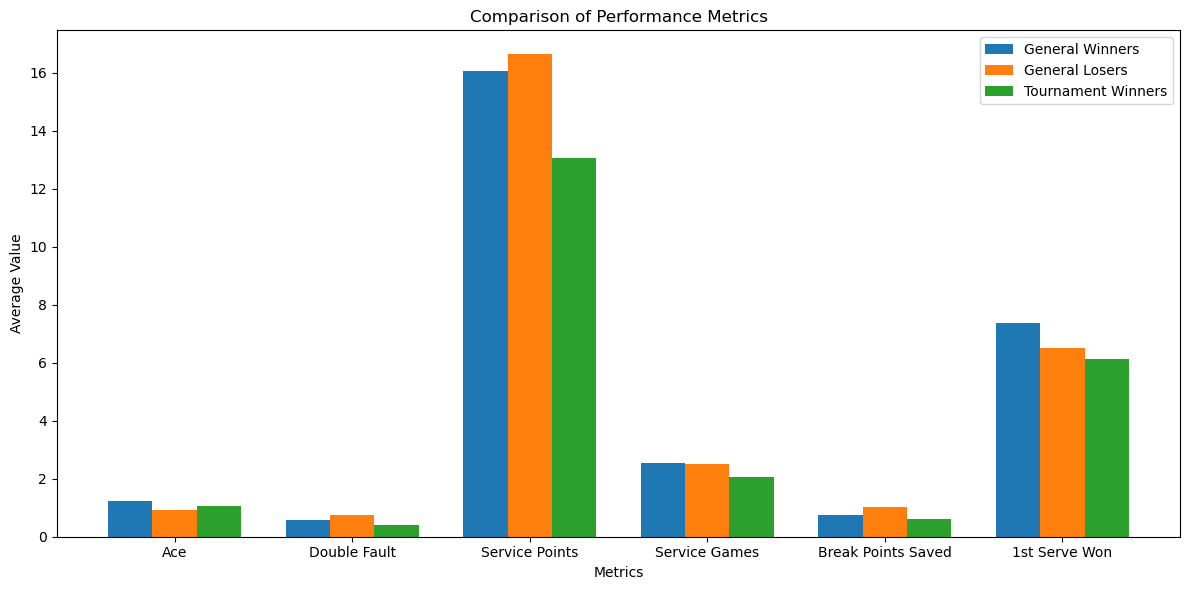

In [260]:
import matplotlib.pyplot as plt

# Metrics for winners
win_metrics = win_prm_op[0]

# Metrics for losers
los_metrics = los_prm_op[0]

# Metrics for tournament winners
tourney_win_metrics = tourney_win_prm_op[0]

# Labels for the metrics
metrics_labels = ["Ace", "Double Fault", "Service Points", "Service Games", "Break Points Saved", "1st Serve Won"]

# Plotting
plt.figure(figsize=(12, 6))
bar_width = 0.25
index = range(len(metrics_labels))

plt.bar(index, win_metrics, bar_width, label="General Winners")
plt.bar([i + bar_width for i in index], los_metrics, bar_width, label="General Losers")
plt.bar([i + 2 * bar_width for i in index], tourney_win_metrics, bar_width, label="Tournament Winners")

plt.xlabel("Metrics")
plt.ylabel("Average Value")
plt.title("Comparison of Performance Metrics")
plt.xticks([i + bar_width for i in index], metrics_labels)
plt.legend()
plt.tight_layout()
plt.show()


In [261]:
from pyspark.sql.functions import avg

# Define the list of top players
top_players = ["Roger Federer", "Rafael Nadal", "Novak Djokovic", "Andre Agassi", "Pete Sampras"]

# Initialize empty lists to store the collected results
top_players_ops = []

# Loop through each top player and collect the results
for player in top_players:
    player_query = matches.filter(col("winner_name") == player) \
                         .select(avg(when(col("w_ace").isNotNull(), col("w_ace")).otherwise(0)).alias("avg_w_ace"),
                                 avg(when(col("w_df").isNotNull(), col("w_df")).otherwise(0)).alias("avg_w_df"),
                                 avg(when(col("w_svpt").isNotNull(), col("w_svpt")).otherwise(0)).alias("avg_w_svpt"),
                                 avg(when(col("w_SvGms").isNotNull(), col("w_SvGms")).otherwise(0)).alias("avg_w_SvGms"),
                                 avg(when(col("w_bpSaved").isNotNull(), col("w_bpSaved")).otherwise(0)).alias("avg_w_bpSaved"),
                                 avg(when(col("w_1stWon").isNotNull(), col("w_1stWon")).otherwise(0)).alias("avg_w_1stWon")) \
                         .collect()
    top_players_ops.append(player_query)

# Print the collected results
for i, player in enumerate(top_players):
    print(player + " Metrics:")
    print(top_players_ops[i])


Roger Federer Metrics:
[Row(avg_w_ace=7.248275862068965, avg_w_df=1.5218390804597701, avg_w_svpt=67.89348659003831, avg_w_SvGms=11.456704980842911, avg_w_bpSaved=2.3302681992337164, avg_w_1stWon=33.600766283524905)]
Rafael Nadal Metrics:
[Row(avg_w_ace=2.907758620689655, avg_w_df=1.4474137931034483, avg_w_svpt=64.28017241379311, avg_w_SvGms=10.669827586206896, avg_w_bpSaved=2.739655172413793, avg_w_1stWon=32.33448275862069)]
Novak Djokovic Metrics:
[Row(avg_w_ace=5.250643776824035, avg_w_df=1.9828326180257512, avg_w_svpt=68.47467811158798, avg_w_SvGms=11.306437768240343, avg_w_bpSaved=2.730472103004292, avg_w_1stWon=33.75021459227468)]
Andre Agassi Metrics:
[Row(avg_w_ace=3.6031567080045095, avg_w_df=1.585118376550169, avg_w_svpt=54.37542277339346, avg_w_SvGms=8.798196166854567, avg_w_bpSaved=2.2795941375422775, avg_w_1stWon=25.942502818489288)]
Pete Sampras Metrics:
[Row(avg_w_ace=9.35593220338983, avg_w_df=2.8696219035202084, avg_w_svpt=67.625814863103, avg_w_SvGms=10.694915254237289

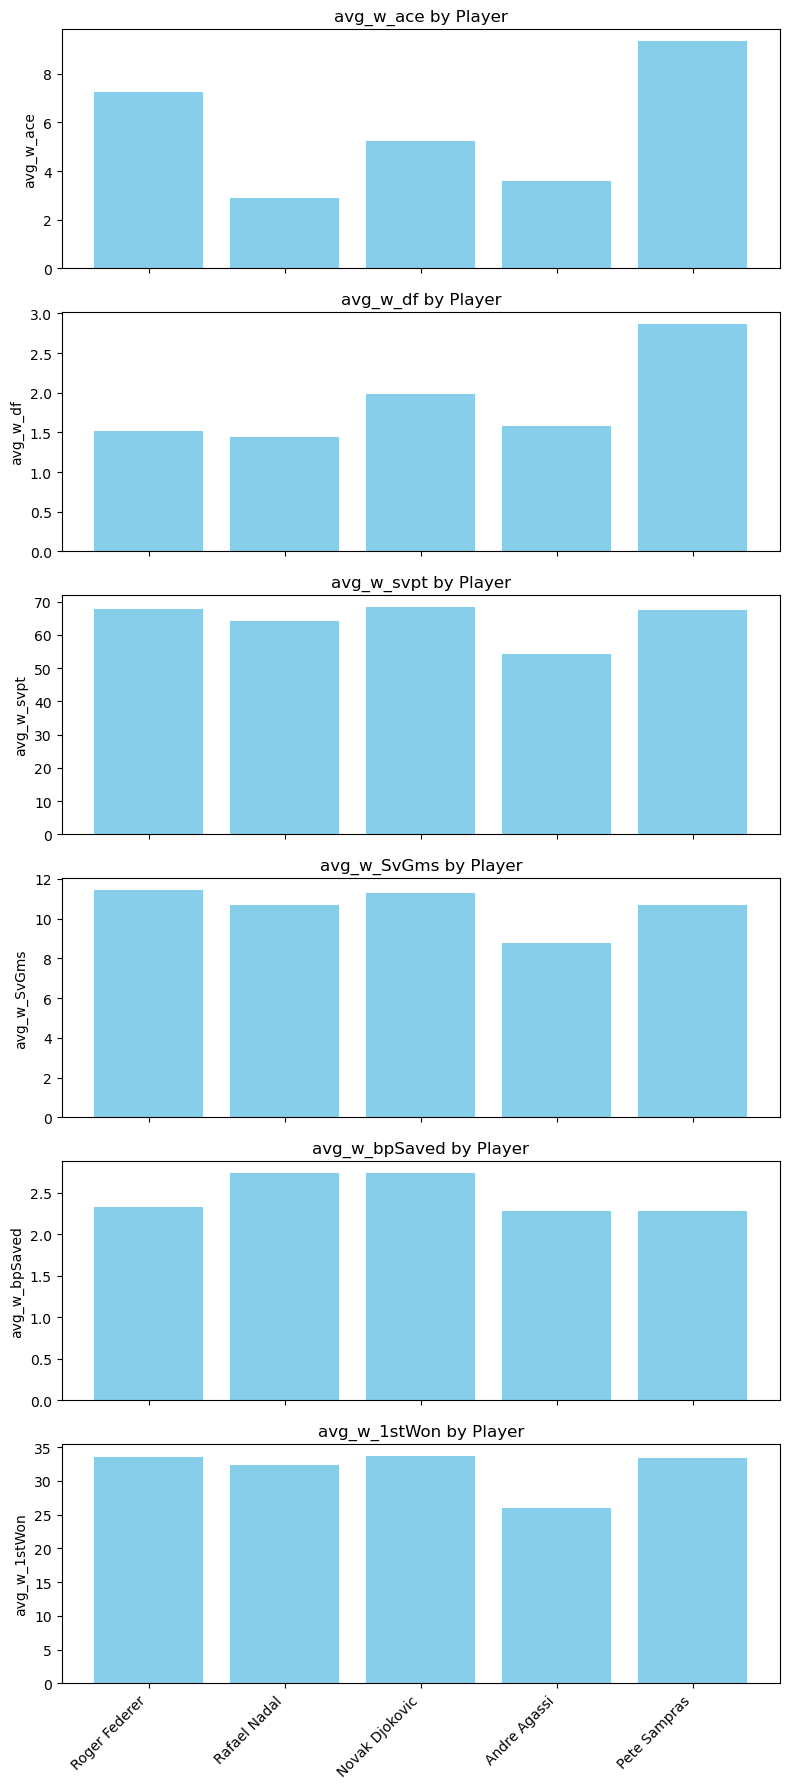

In [270]:
import matplotlib.pyplot as plt
import numpy as np

# Define the list of metrics
metrics = ['avg_w_ace', 'avg_w_df', 'avg_w_svpt', 'avg_w_SvGms', 'avg_w_bpSaved', 'avg_w_1stWon']

# Initialize subplots
fig, axs = plt.subplots(len(metrics), 1, figsize=(8, 18), sharex=True)

# Loop through each metric and plot bar chart for each player
for i, metric in enumerate(metrics):
    metric_values = [result[0][metric] for result in top_players_ops]
    x = np.arange(len(top_players))
    axs[i].bar(x, metric_values, color='skyblue')
    axs[i].set_ylabel(metric)
    axs[i].set_title(f'{metric} by Player')
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(top_players, rotation=45, ha='right')

plt.tight_layout()
plt.show()

